In [ ]:
#Lab | Handling Data Imbalance in Classification Models
#For this lab and in the next lessons we will build a model on customer churn binary classification problem. 
#You will be using files_for_lab/Customer-Churn.csv file.

#Scenario
#You are working as an analyst with this internet service provider. 
#You are provided with this historical data about your company's customers and their churn trends. 
#Your task is to build a machine learning model that will help the company 
#identify customers that are more likely to default/churn and thus prevent losses from such customers.

#Instructions
#In this lab, we will first take a look at the degree of imbalance 
#in the data and correct it using the techniques we learned on the class.

#Here is the list of steps to be followed (building a simple model without balancing the data):

#Import the required libraries and modules that you would need.
#Read that data into Python and call the dataframe churnData.
#Check the datatypes of all the columns in the data. 
    #You would see that the column TotalCharges is object type. 
    #Convert this column into numeric type using pd.to_numeric function.
#Check for null values in the dataframe. Replace the null values.
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    #Scale the features either by using normalizer or a standard scaler.
    #Split the data into a training set and a test set.
    #Fit a logistic regression model on the training data.
    #Check the accuracy on the test data.

#Note: So far we have not balanced the data.

#Managing imbalance in the dataset

#Check for the imbalance.
#Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two claread_csvsses.
#Each time fit the model and see how the accuracy of the model is.

In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [23]:
churnData=pd.read_csv(r'C:\Users\TOSHIBA\Downloads\Ironhack\Activities\Activities Python\Databases\Customer-Churn.csv')
churnData.columns=[c.lower().replace(' ', '_') for c in churnData.columns]
churnData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [24]:
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
churnData['totalcharges']= pd.to_numeric(churnData['totalcharges'])

ValueError: Unable to parse string " " at position 488

In [13]:
churnData.iloc[488]

gender                Female
seniorcitizen              0
partner                  Yes
dependents               Yes
tenure                     0
phoneservice              No
onlinesecurity           Yes
onlinebackup              No
deviceprotection         Yes
techsupport              Yes
streamingtv              Yes
streamingmovies           No
contract            Two year
monthlycharges         52.55
totalcharges                
churn                     No
Name: 488, dtype: object

In [25]:
#Utilizamos el valor mas comun
churnData['totalcharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

In [26]:
churnData['totalcharges']=churnData['totalcharges'].replace(' ','20.2')

In [27]:
churnData.iloc[488]

gender                Female
seniorcitizen              0
partner                  Yes
dependents               Yes
tenure                     0
phoneservice              No
onlinesecurity           Yes
onlinebackup              No
deviceprotection         Yes
techsupport              Yes
streamingtv              Yes
streamingmovies           No
contract            Two year
monthlycharges         52.55
totalcharges            20.2
churn                     No
Name: 488, dtype: object

In [70]:
churnData['totalcharges']= pd.to_numeric(churnData['totalcharges'],errors='coerce')
churnData.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [72]:
churnData.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [39]:
#Revisamos que no haya "falsos" nulos
churnData['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [40]:
churnData['seniorcitizen'].unique()

array([0, 1], dtype=int64)

In [43]:
churnData['monthlycharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [45]:
churnData['totalcharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [51]:
#Definimos X y Y
X=churnData.select_dtypes(exclude=["object"])
y=churnData['churn']

In [54]:
#Normalizamos X
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X)
x_norm=transformer.transform(X)
x_norm=pd.DataFrame(X)
x_norm

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [55]:
#Split de la data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [60]:
#Aplicando modelo de regresion logistica
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [61]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [62]:
#Verificando el score
logr.score(X,y)

0.7914241090444413

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, logr.predict(X))

array([[4724,  450],
       [1019,  850]], dtype=int64)

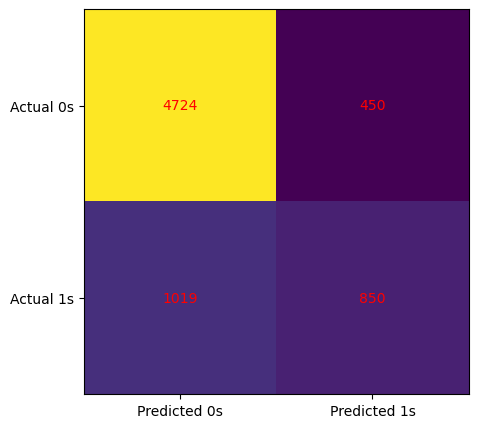

In [68]:
cm = confusion_matrix(y, logr.predict(X))


fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [69]:
#Verificando el imbalance
churnData['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [81]:
! pip install imblearn

     ------------------------------------ 226.0/226.0 kB 306.5 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [83]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
y=churnData['churn']
X=x_norm
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [84]:
logr.score(X_sm,y_sm)

0.6688248936992656

In [91]:
import imblearn
print(imblearn.__version__)

0.10.1


In [94]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
y=churnData['churn']
X=x_norm
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(y_over.value_counts())

No     5174
Yes    5174
Name: churn, dtype: int64


In [95]:
logr.score(X_over,y_over)

0.6796482412060302

In [97]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
y=churnData['churn']
X=x_norm
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(y_under.value_counts())

No     1869
Yes    1869
Name: churn, dtype: int64


In [98]:
logr.score(X_under,y_under)

0.6837881219903692

In [99]:
c={'LogisticRegresionScore':[0.7914241090444413], 'LRUndersamplingScore':[0.6837881219903692],
   'LROverSamplingScore':[0.6796482412060302]}
comparison=pd.DataFrame(data=c)
comparison

,LogisticRegresionScore,LRUndersamplingScore,LROverSamplingScore
0,0.791424,0.683788,0.679648
